In [ ]:
# ! pip install seaborn
# ! pip install amplpy

In [1]:
from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["gurobi", "coin", "highs", "gokestrel"],  # modules to install
    license_uuid="default",  # license to use
)  # instantiate AMPL object and register magics

AMPL Development Version 20250318 (MSVC 19.43.34808.0, 64-bit)
Demo license with maintenance expiring 20270131.
Using license file "c:\Users\asifat\AppData\Local\anaconda3\envs\asifat\Lib\site-packages\ampl_module_base\bin\ampl.lic".



In [2]:
%%ampl_eval

var x1 >= 0;
var x2 >= 0;

maximize profit: x1 + x2;

s.t. ineq_1: x1 <= 1000;
s.t. ineq_2: x2 <= 1500;
s.t. ineq_3: x1 + x2 <= 1750;
s.t. ineq_: 4 * x1 + 2 * x2 <= 4800;

In [3]:
# exhibit the model that has been built
ampl.eval("show;")
ampl.eval("expand;")


variables:   x1   x2

constraints:   ineq_   ineq_1   ineq_2   ineq_3

objective:   profit
maximize profit:
	x1 + x2;

subject to ineq_1:
	x1 <= 1000;

subject to ineq_2:
	x2 <= 1500;

subject to ineq_3:
	x1 + x2 <= 1750;

subject to ineq_:
	4*x1 + 2*x2 <= 4800;



In [4]:
ampl.option["solver"] = 'gurobi'
ampl.solve()

print(f'x = ({ampl.var["x1"].value():.1f}, {ampl.var["x2"].value():.1f})')
print(f'optimal value = {ampl.obj["profit"].value():.2f}')

Gurobi 12.0.1:Gurobi 12.0.1: optimal solution; objective 1750
2 simplex iterations
x = (650.0, 1100.0)
optimal value = 1750.00


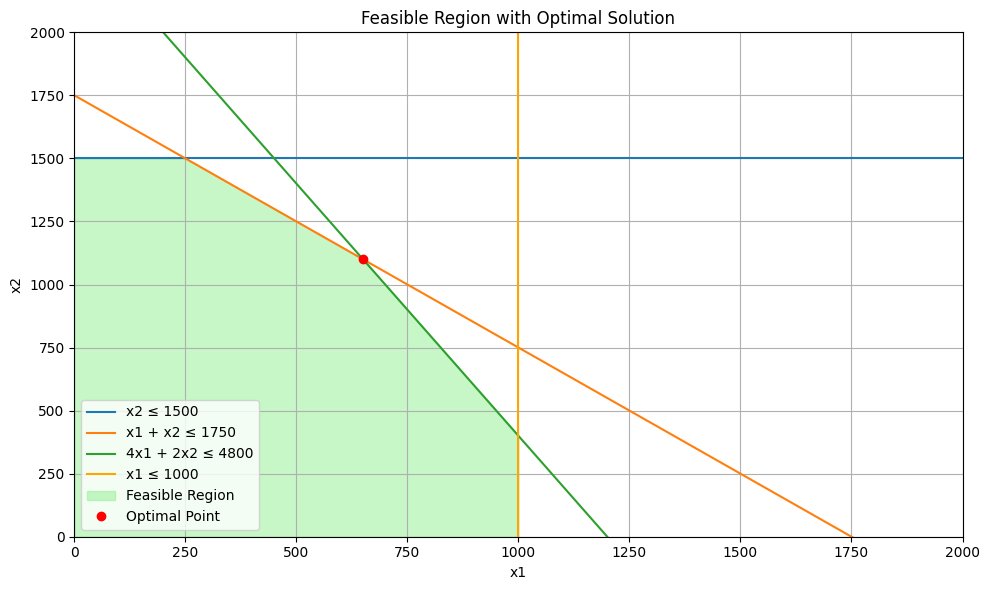

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define x1 range for plotting
x1 = np.linspace(0, 2000, 400)

# Constraints 
x2_ineq1 = np.full_like(x1, 1500)         # x2 <= 1500
x2_ineq2 = 1750 - x1                      # x1 + x2 <= 1750
x2_ineq3 = (4800 - 4 * x1) / 2            # 4x1 + 2x2 <= 4800 

# Feasible region boundaries
x1_feas = np.linspace(0, 1000, 400)
x2_upper = np.minimum.reduce([
    1500 * np.ones_like(x1_feas),
    1750 - x1_feas,
    (4800 - 4 * x1_feas) / 2
])

x2_upper = np.maximum(0, x2_upper)  # Ensure feasibility

# Plot feasible region
plt.figure(figsize=(10, 6))
plt.plot(x1, x2_ineq1, label='x2 ≤ 1500')
plt.plot(x1, x2_ineq2, label='x1 + x2 ≤ 1750')
plt.plot(x1, x2_ineq3, label='4x1 + 2x2 ≤ 4800')
plt.axvline(1000, color='orange', label='x1 ≤ 1000')
plt.fill_between(x1_feas, 0, x2_upper, color='lightgreen', alpha=0.5, label='Feasible Region')

# Add optimal point (replace these with your actual AMPL values)
x1_opt = ampl.var["x1"].value()
x2_opt = ampl.var["x2"].value()
plt.plot(x1_opt, x2_opt, 'ro', label='Optimal Point')

# Labels and legend
plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feasible Region with Optimal Solution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
